In [492]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [493]:
dfH = pd.read_csv('/Users/praneetpeshkar/Desktop/Major Project/datasets/Hyderabad_rent.csv')
dfD = pd.read_csv('/Users/praneetpeshkar/Desktop/Major Project/datasets/Delhi_rent.csv')
dfM = pd.read_csv('/Users/praneetpeshkar/Desktop/Major Project/datasets/Mumbai_rent.csv')
dfC = pd.read_csv('/Users/praneetpeshkar/Desktop/Major Project/datasets/Chennai_rent.csv')
dfK = pd.read_csv('/Users/praneetpeshkar/Desktop/Major Project/datasets/Kolkata_rent.csv')
dfB = pd.read_csv('/Users/praneetpeshkar/Desktop/Major Project/datasets/Bangalore_rent.csv')

In [494]:
dfs = [dfH,dfD,dfM,dfC,dfK,dfB]
cities = ['Hyderabad', 'Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Bangalore']

for df,city in zip(dfs,cities):
    df['city']=city
    print(city,df.shape)

Hyderabad (10757, 10)
Delhi (33500, 10)
Mumbai (68518, 10)
Chennai (9283, 10)
Kolkata (9900, 10)
Bangalore (23540, 10)


In [495]:
df = pd.concat(dfs)
df.shape

(155498, 10)

In [496]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,1.0,RK,Studio Apartment,Serilingampally,"6,720",320.0,Furnished,1 bathrooms,Hyderabad
1,OWNER,5.0,BHK,Villa,Sri Nagar Colony,"36,000",3000.0,Semi-Furnished,4 bathrooms,Hyderabad
2,OWNER,2.0,BHK,Independent House,Shaikpet,"11,000",900.0,Semi-Furnished,2 bathrooms,Hyderabad
3,OWNER,3.0,BHK,Apartment,Nanakramguda,"45,000",2165.0,Unfurnished,3 bathrooms,Hyderabad
4,OWNER,3.0,BHK,Apartment,Kondapur,"20,000",1600.0,Semi-Furnished,3 bathrooms,Hyderabad


In [497]:
df.describe()

,bedroom,area
count,154437.000000,154437.000000
mean,2.048764,1246.972468
std,0.977934,1104.038100
min,1.000000,3.000000
25%,1.000000,650.000000
50%,2.000000,990.000000
75%,3.000000,1377.000000
max,15.000000,19800.000000


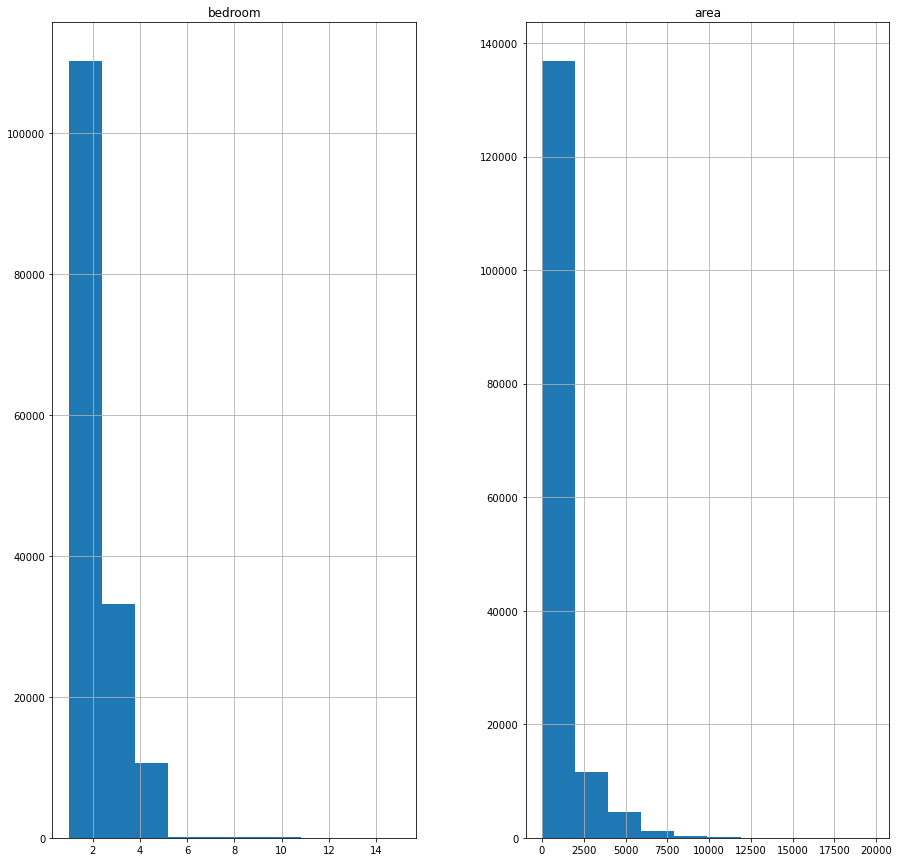

In [498]:
df.hist(bins = 10,figsize = (15,15))
plt.show()

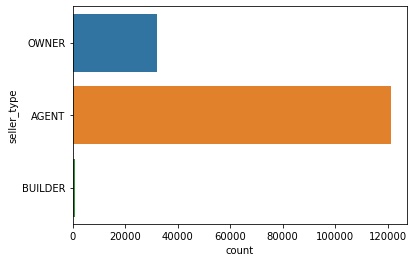

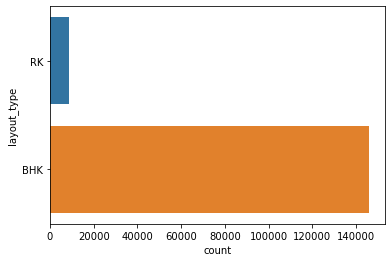

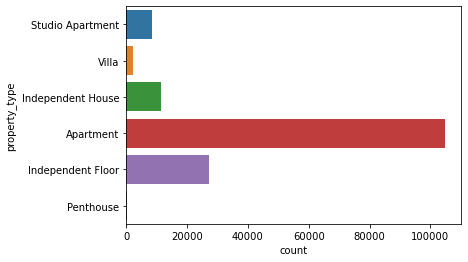

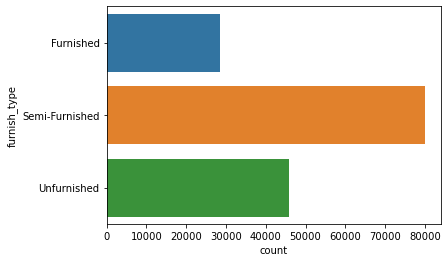

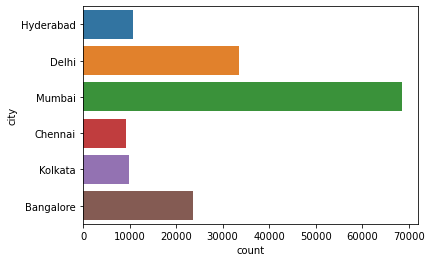

In [499]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        sns.countplot(y=column, data=df)
        plt.show()

In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155498 entries, 0 to 23539
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    154434 non-null  object 
 1   bedroom        154437 non-null  float64
 2   layout_type    154437 non-null  object 
 3   property_type  154437 non-null  object 
 4   locality       154436 non-null  object 
 5   price          154437 non-null  object 
 6   area           154437 non-null  float64
 7   furnish_type   154437 non-null  object 
 8   bathroom       152387 non-null  object 
 9   city           155498 non-null  object 
dtypes: float64(2), object(8)
memory usage: 17.1+ MB


In [501]:
#checking missing values
df.isnull().sum()

seller_type      1064
bedroom          1061
layout_type      1061
property_type    1061
locality         1062
price            1061
area             1061
furnish_type     1061
bathroom         3111
city                0
dtype: int64

In [502]:
df=df.dropna()
df.shape

(152383, 10)

In [503]:
#checking all unique values 
print(df.seller_type.unique())
print(df.seller_type.value_counts())

['OWNER' 'AGENT' 'BUILDER']
AGENT      119819
OWNER       31632
BUILDER       932
Name: seller_type, dtype: int64


In [504]:
print(df.bedroom.unique())
print(df.bedroom.value_counts())

[ 1.  5.  2.  3.  6.  4. 10. 11.  8.  7.  9. 15. 12. 14.]
2.0     59208
1.0     49411
3.0     32901
4.0      9310
5.0      1199
6.0       131
10.0       74
8.0        46
7.0        45
9.0        23
15.0       22
12.0        6
14.0        4
11.0        3
Name: bedroom, dtype: int64


In [505]:
print(df.layout_type.unique())
print(df.layout_type.value_counts())

['RK' 'BHK']
BHK    144188
RK       8195
Name: layout_type, dtype: int64


In [506]:
print(df.property_type.unique())
print(df.property_type.value_counts())

['Studio Apartment' 'Villa' 'Independent House' 'Apartment'
 'Independent Floor' 'Penthouse']
Apartment            103764
Independent Floor     26840
Independent House     11253
Studio Apartment       8195
Villa                  2199
Penthouse               132
Name: property_type, dtype: int64


In [507]:
print(df.furnish_type.unique())
print(df.furnish_type.value_counts())

['Furnished' 'Semi-Furnished' 'Unfurnished']
Semi-Furnished    79129
Unfurnished       45250
Furnished         28004
Name: furnish_type, dtype: int64


In [508]:
print(df.bathroom.unique())
print(df.bathroom.value_counts())

['1 bathrooms' '4 bathrooms' '2 bathrooms' '3 bathrooms' '5 bathrooms'
 'East facing' 'West facing' 'North facing' 'South facing' '6 bathrooms'
 '7 bathrooms' 'Grfloor' '10 bathrooms' '12 bathrooms' '8 bathrooms'
 'NorthWest facing' '4 of 5floor' '9 bathrooms' 'NorthEast facing'
 'SouthEast facing' '16 bathrooms' '14 bathrooms' '15 bathrooms'
 'Gr of 2floor' '3 of 3floor' '4 of 9floor' '3 of 4floor' '2 of 4floor'
 '2 of 3floor' '3 of 5floor' '1 of 3floor' '2 of 5floor'
 'SouthWest facing' 'availability immediately' '2 of 7floor'
 '7 of 12floor' 'Family only' '17 of 29floor' '10 of 16floor'
 '4 of 7floor' '17 of 25floor' '6 of 7floor' '11 of 17floor'
 '15 of 28floor' '5 of 14floor' '6 of 8floor' '9 of 12floor' '3 of 7floor'
 '1 of 4floor' '12 of 16floor' '7 of 16floor' '1 of 6floor' '18 bathrooms'
 '19 bathrooms' '1 of 2floor']
2 bathrooms                 71127
1 bathrooms                 45390
3 bathrooms                 24654
4 bathrooms                  8630
5 bathrooms              

In [509]:
#removing unnecessary values
df=df[df.bathroom.str.contains('bathrooms')]
df.shape

(151962, 10)

In [510]:
print(df.bathroom.unique())
print(df.bathroom.value_counts())

['1 bathrooms' '4 bathrooms' '2 bathrooms' '3 bathrooms' '5 bathrooms'
 '6 bathrooms' '7 bathrooms' '10 bathrooms' '12 bathrooms' '8 bathrooms'
 '9 bathrooms' '16 bathrooms' '14 bathrooms' '15 bathrooms' '18 bathrooms'
 '19 bathrooms']
2 bathrooms     71127
1 bathrooms     45390
3 bathrooms     24654
4 bathrooms      8630
5 bathrooms      1593
6 bathrooms       331
7 bathrooms        74
9 bathrooms        55
8 bathrooms        48
10 bathrooms       34
15 bathrooms        7
16 bathrooms        6
14 bathrooms        6
12 bathrooms        4
19 bathrooms        2
18 bathrooms        1
Name: bathroom, dtype: int64


In [511]:
df['bathroom'] = df['bathroom'].str.replace(r'[^\d.]+', '', regex=True)
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,1.0,RK,Studio Apartment,Serilingampally,"6,720",320.0,Furnished,1,Hyderabad
1,OWNER,5.0,BHK,Villa,Sri Nagar Colony,"36,000",3000.0,Semi-Furnished,4,Hyderabad
2,OWNER,2.0,BHK,Independent House,Shaikpet,"11,000",900.0,Semi-Furnished,2,Hyderabad
3,OWNER,3.0,BHK,Apartment,Nanakramguda,"45,000",2165.0,Unfurnished,3,Hyderabad
4,OWNER,3.0,BHK,Apartment,Kondapur,"20,000",1600.0,Semi-Furnished,3,Hyderabad


In [512]:
df['bathroom'] = df['bathroom'].astype('float64', errors = 'raise')

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151962 entries, 0 to 23539
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    151962 non-null  object 
 1   bedroom        151962 non-null  float64
 2   layout_type    151962 non-null  object 
 3   property_type  151962 non-null  object 
 4   locality       151962 non-null  object 
 5   price          151962 non-null  object 
 6   area           151962 non-null  float64
 7   furnish_type   151962 non-null  object 
 8   bathroom       151962 non-null  float64
 9   city           151962 non-null  object 
dtypes: float64(3), object(7)
memory usage: 12.8+ MB


In [514]:
df['p2'] = df['price'].apply(lambda x : '0' if ',' in x else '1')
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,p2
0,OWNER,1.0,RK,Studio Apartment,Serilingampally,"6,720",320.0,Furnished,1.0,Hyderabad,0
1,OWNER,5.0,BHK,Villa,Sri Nagar Colony,"36,000",3000.0,Semi-Furnished,4.0,Hyderabad,0
2,OWNER,2.0,BHK,Independent House,Shaikpet,"11,000",900.0,Semi-Furnished,2.0,Hyderabad,0
3,OWNER,3.0,BHK,Apartment,Nanakramguda,"45,000",2165.0,Unfurnished,3.0,Hyderabad,0
4,OWNER,3.0,BHK,Apartment,Kondapur,"20,000",1600.0,Semi-Furnished,3.0,Hyderabad,0


In [515]:
df['price'] = df['price'].str.replace(r'[^\d.]+', '', regex=True)
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,p2
0,OWNER,1.0,RK,Studio Apartment,Serilingampally,6720,320.0,Furnished,1.0,Hyderabad,0
1,OWNER,5.0,BHK,Villa,Sri Nagar Colony,36000,3000.0,Semi-Furnished,4.0,Hyderabad,0
2,OWNER,2.0,BHK,Independent House,Shaikpet,11000,900.0,Semi-Furnished,2.0,Hyderabad,0
3,OWNER,3.0,BHK,Apartment,Nanakramguda,45000,2165.0,Unfurnished,3.0,Hyderabad,0
4,OWNER,3.0,BHK,Apartment,Kondapur,20000,1600.0,Semi-Furnished,3.0,Hyderabad,0


In [516]:
df['price'] = df['price'].astype('float64')
df.loc[df.p2.str.contains('1'), 'price'] *= 100000.0
df.drop('p2',axis=1,inplace=True)
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,1.0,RK,Studio Apartment,Serilingampally,6720.0,320.0,Furnished,1.0,Hyderabad
1,OWNER,5.0,BHK,Villa,Sri Nagar Colony,36000.0,3000.0,Semi-Furnished,4.0,Hyderabad
2,OWNER,2.0,BHK,Independent House,Shaikpet,11000.0,900.0,Semi-Furnished,2.0,Hyderabad
3,OWNER,3.0,BHK,Apartment,Nanakramguda,45000.0,2165.0,Unfurnished,3.0,Hyderabad
4,OWNER,3.0,BHK,Apartment,Kondapur,20000.0,1600.0,Semi-Furnished,3.0,Hyderabad


In [517]:
inflation = 4.47/100
df['price']=df['price']+(df['price']*inflation*6/12)
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,1.0,RK,Studio Apartment,Serilingampally,6870.192,320.0,Furnished,1.0,Hyderabad
1,OWNER,5.0,BHK,Villa,Sri Nagar Colony,36804.600,3000.0,Semi-Furnished,4.0,Hyderabad
2,OWNER,2.0,BHK,Independent House,Shaikpet,11245.850,900.0,Semi-Furnished,2.0,Hyderabad
3,OWNER,3.0,BHK,Apartment,Nanakramguda,46005.750,2165.0,Unfurnished,3.0,Hyderabad
4,OWNER,3.0,BHK,Apartment,Kondapur,20447.000,1600.0,Semi-Furnished,3.0,Hyderabad


In [518]:
locality_c = df.groupby('locality').size().sort_values(ascending=False)
locality_c

locality
Thane West                4478
Chembur                   3549
Andheri East              3415
Kharghar                  2614
Andheri West              2368
                          ... 
Jorabagan                    1
Sarvagnanagar                1
Jorasanko                    1
Joseph Patel Wadi            1
1 Sector Number 3 Road       1
Length: 3515, dtype: int64

In [519]:
for i in range(1,11):
    print('no of localities with houses less than ',i,'is ',len(locality_c[locality_c<i]))
    

no of localities with houses less than  1 is  0
no of localities with houses less than  2 is  1040
no of localities with houses less than  3 is  1598
no of localities with houses less than  4 is  1857
no of localities with houses less than  5 is  2024
no of localities with houses less than  6 is  2152
no of localities with houses less than  7 is  2256
no of localities with houses less than  8 is  2322
no of localities with houses less than  9 is  2390
no of localities with houses less than  10 is  2440


In [520]:
#loc_10 = locality_c[locality_c<10]


In [521]:
#df.locality = df.locality.apply(lambda x: 'other' if x in loc_10 else x)


In [522]:
# converting categorical data into numeric data
enc=LabelEncoder()

In [523]:
seller_type=enc.fit_transform(df['seller_type'])
layout_type=enc.fit_transform(df['layout_type'])
property_type=enc.fit_transform(df['property_type'])
furnish_type=enc.fit_transform(df['furnish_type'])
locality=enc.fit_transform(df['locality'])
city=enc.fit_transform(df['city'])

In [524]:
df['seller_type']=seller_type
df['layout_type']=layout_type
df['property_type']=property_type
df['furnish_type']=furnish_type
df['locality']=locality
df['city']=city

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151962 entries, 0 to 23539
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    151962 non-null  int64  
 1   bedroom        151962 non-null  float64
 2   layout_type    151962 non-null  int64  
 3   property_type  151962 non-null  int64  
 4   locality       151962 non-null  int64  
 5   price          151962 non-null  float64
 6   area           151962 non-null  float64
 7   furnish_type   151962 non-null  int64  
 8   bathroom       151962 non-null  float64
 9   city           151962 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 12.8 MB


In [526]:
df.describe()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
count,151962.000000,151962.000000,151962.000000,151962.000000,151962.000000,1.519620e+05,151962.000000,151962.000000,151962.000000,151962.000000
mean,0.421888,2.053329,0.053046,0.611271,1715.147530,5.141016e+04,1251.811940,1.113022,2.028158,3.166858
std,0.812262,0.978032,0.224126,1.147303,988.948819,1.045610e+05,1108.659904,0.683990,0.949438,1.902433
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.226820e+03,3.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,906.000000,1.329055e+04,650.000000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,0.000000,0.000000,1616.000000,2.330958e+04,1000.000000,1.000000,2.000000,4.000000
75%,0.000000,3.000000,0.000000,1.000000,2589.000000,4.089400e+04,1390.000000,2.000000,2.000000,5.000000
max,2.000000,15.000000,1.000000,5.000000,3514.000000,6.016530e+06,19800.000000,2.000000,19.000000,5.000000


In [527]:
df=df[(df['price']<75000) & (df['bathroom']<7) & (df['bedroom']<7) & (df['area']<10000) ]

In [528]:
scaler = MinMaxScaler()
sc = ['seller_type','layout_type','bedroom','property_type','locality','area','furnish_type','bathroom','city']
df[sc] = scaler.fit_transform(df[sc])

In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132464 entries, 0 to 23539
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    132464 non-null  float64
 1   bedroom        132464 non-null  float64
 2   layout_type    132464 non-null  float64
 3   property_type  132464 non-null  float64
 4   locality       132464 non-null  float64
 5   price          132464 non-null  float64
 6   area           132464 non-null  float64
 7   furnish_type   132464 non-null  float64
 8   bathroom       132464 non-null  float64
 9   city           132464 non-null  float64
dtypes: float64(10)
memory usage: 11.1 MB


In [530]:
df.describe()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
count,132464.000000,132464.000000,132464.000000,132464.000000,132464.000000,132464.000000,132464.000000,132464.000000,132464.000000,132464.000000
mean,0.238480,0.171053,0.060726,0.114783,0.492140,24246.287665,0.138790,0.554052,0.164431,0.628856
std,0.424194,0.156931,0.238828,0.222304,0.280632,15506.064437,0.070822,0.333179,0.143154,0.388872
min,0.000000,0.000000,0.000000,0.000000,0.000000,1226.820000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.259533,12268.200000,0.085322,0.500000,0.000000,0.400000
50%,0.000000,0.200000,0.000000,0.000000,0.461867,20447.000000,0.128198,0.500000,0.200000,0.800000
75%,0.000000,0.200000,0.000000,0.200000,0.736767,32715.200000,0.171073,1.000000,0.200000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,74631.550000,1.000000,1.000000,1.000000,1.000000


In [531]:
#After Data Preprocessing

In [532]:
df.shape

(132464, 10)

In [533]:
df.corr

<bound method DataFrame.corr of        seller_type  bedroom  layout_type  property_type  locality      price  \
0              1.0      0.0          1.0            0.8  0.809334   6870.192   
1              1.0      0.8          0.0            1.0  0.845475  36804.600   
2              1.0      0.2          0.0            0.4  0.814172  11245.850   
3              1.0      0.4          0.0            0.0  0.580250  46005.750   
4              1.0      0.4          0.0            0.0  0.445931  20447.000   
...            ...      ...          ...            ...       ...        ...   
23535          1.0      0.0          0.0            0.2  0.080820   6134.100   
23536          1.0      0.2          0.0            0.4  0.937678  10734.675   
23537          1.0      0.2          0.0            0.4  0.313603  16357.600   
23538          1.0      0.2          0.0            0.0  0.818441  24536.400   
23539          1.0      0.4          0.0            0.2  0.976665  19424.650   

       

In [534]:
# Making data suitable for ML algorithms 

In [535]:
X = df.drop(['price'], axis=1)
y = df['price']

In [536]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [537]:
print('X train - ',X_train.shape)
print('Y train - ',y_train.shape)
print('X test - ',X_test.shape)
print('Y test - ',y_test.shape)

X train -  (99348, 9)
Y train -  (99348,)
X test -  (33116, 9)
Y test -  (33116,)


In [538]:
# Algorithms 

In [539]:
def mae (y_true, y_pred):
    return np.mean(abs(y_true-y_pred))

In [540]:
def model_test(model):
    model.fit(X,y)
    predic = model.predict(X_test)
    print('MAE : ',mae(y_test,predic))
    print('R2 Score : ',r2_score(y_test,predic))

In [541]:
lr = LinearRegression()
model_test(lr)

MAE :  8344.341636582096
R2 Score :  0.49115380198962943


In [542]:
knn = KNeighborsRegressor(n_neighbors=5)
model_test(knn)

MAE :  3087.7524146178184
R2 Score :  0.878948476309863


In [543]:
tree = DecisionTreeRegressor(random_state=12)
model_test(tree)

MAE :  1045.3469121553628
R2 Score :  0.9732424440613004


In [544]:
gb = GradientBoostingRegressor(random_state=12)
model_test(gb)

MAE :  6104.480019832384
R2 Score :  0.6988232187353517


In [545]:
xgb = xgb.XGBRegressor(objective='reg:squarederror')
model_test(xgb)

MAE :  3852.2878447775893
R2 Score :  0.86996218677586


In [546]:
rf = RandomForestRegressor(random_state=12)
model_test(rf)

MAE :  1631.2550404899318
R2 Score :  0.9633487239712453
